In [1]:
#Dicision Tree
#온라인 경매 아이템 - 갤럭시 휴대폰
#1. 판매여부 예측 알고리즘
#2. 예측알고리즘의 변수 영향도 확인

# 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('galaxy.csv')

# 데이터 확인

In [3]:
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [5]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


## 그래프로 데이터 분포 확인

C:\Users\soyoung\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='startprice', ylabel='Density'>

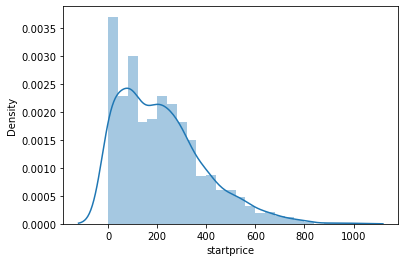

In [6]:
sns.distplot(data['startprice'])

C:\Users\soyoung\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charCountDescription', ylabel='Density'>

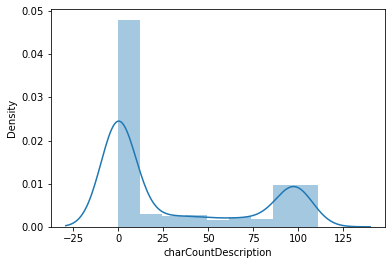

In [7]:
sns.distplot(data['charCountDescription'])

<AxesSubplot:xlabel='productline', ylabel='startprice'>

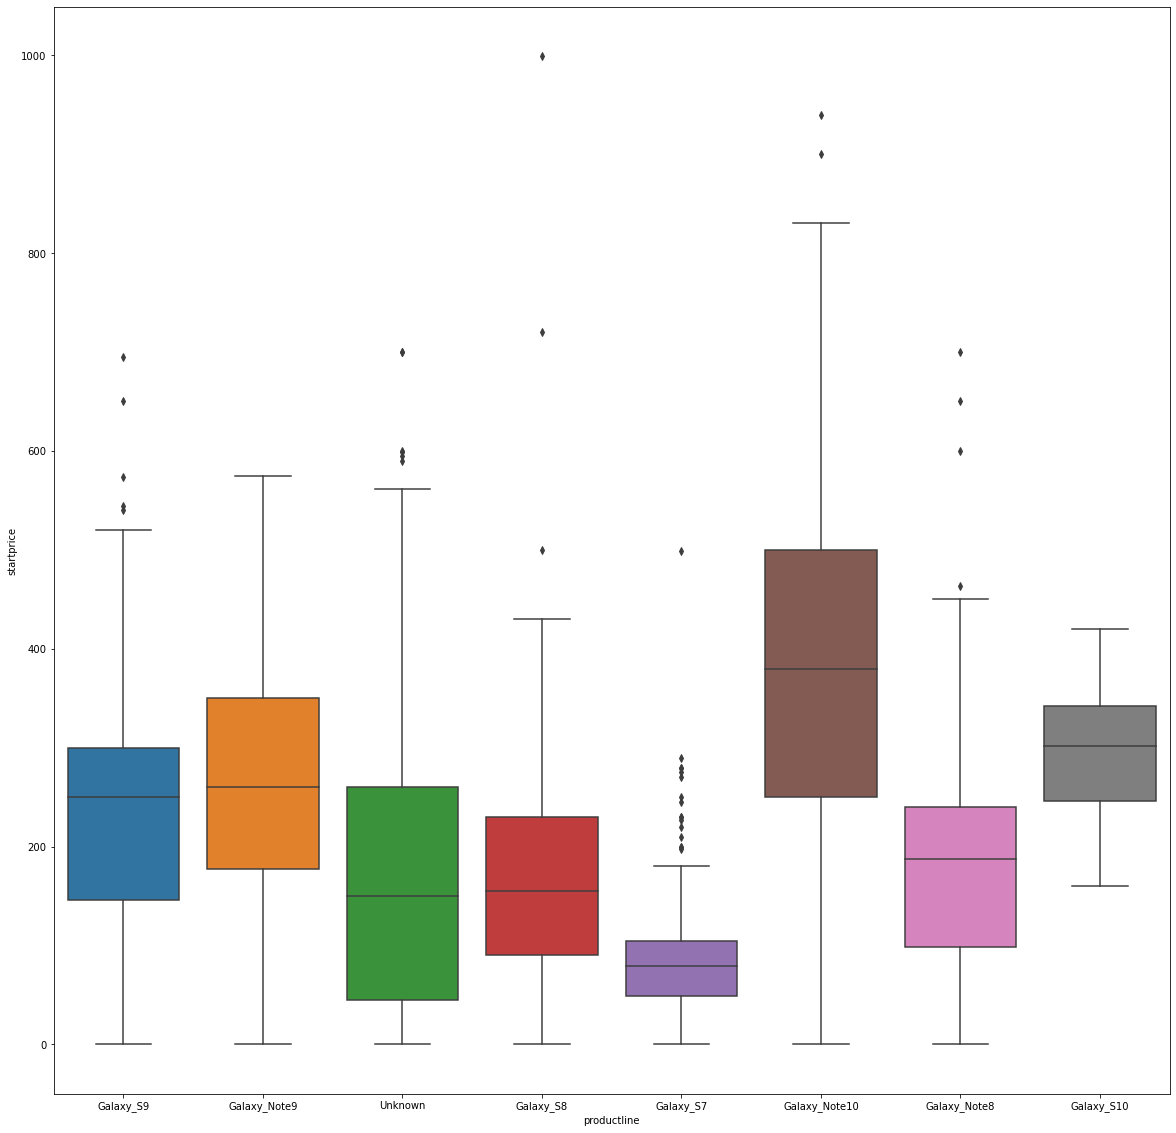

In [8]:
plt.figure(figsize=(20,20))
sns.boxplot(x='productline', y='startprice', data= data)

In [11]:
#데이터 컬럼별 결측치 비율 확인
data.isna().sum() / len(data)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

In [13]:
# carrier, color 컬럼의 결측치 보간이 필요
# 1. 가장 높은 분포를 보이는 항목으로 일괄 보간
# 2. 'Unknown'과 같은 의미를 담은 데이터로 변형

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [15]:
# 모든 결측치에 'Unknown'입력
data = data.fillna('Unknown')
data

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,Unknown,Galaxy_S7,no description,96,2,0
1481,0,239.95,None,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,None,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,None,Midnight Black,Galaxy_S7,no description,92,2,1


# Categorical 변수 처리

In [22]:
# 카테고리 수 확인
data[['carrier','color','productline','noDescription']].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [23]:
data['carrier'].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [24]:
# black 결합 필요
data['color'].value_counts()

Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [25]:
data['productline'].value_counts()

Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64

In [26]:
data['noDescription'].value_counts()

contains description    856
no description          629
Name: noDescription, dtype: int64

## color 변수 'black' 통합

In [33]:
# def black(x):
#     if x == 'Midnight Black':
#         return 'Black'
#     elif x == 'Aura Black':
#         return 'Black'
#     elif x == 'Prism Black':
#         return 'Black'
#     else:
#         return x    


# def black(x):
#     if (x == 'Midnight Black') | (x == 'Aura Black') | (x == 'Prism Black') :
#         return 'Black'
#     else:
#         return 'Black'


def black(x):
    if x in ['Midnight Black','Aura Black','Prism Black']:
        return 'Black'
    else:
        return x

SyntaxError: invalid syntax (511497873.py, line 12)

In [30]:
data['color'] = data['color'].apply(lambda x: black(x))

In [32]:
data['color'].value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [36]:
# 더미변수화

data_dummies = pd.get_dummies(data, columns=['carrier','color','productline','noDescription'], drop_first=True)

In [37]:
data_dummies

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Gold,...,color_Unknown,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
0,0,199.99,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,235.00,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,199.99,100,2,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,1,175.00,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,100.00,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,96,2,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1481,0,239.95,97,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1482,0,329.99,93,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1483,0,89.00,92,2,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


# 모델링

In [47]:
from sklearn.model_selection import train_test_split

X = data_dummies.drop('sold', axis=1)
y = data_dummies['sold']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier(max_depth=10)

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [55]:
pred = model.predict(X_test)

In [53]:
y_test

258     1
57      0
225     1
704     0
1096    0
       ..
44      0
1399    1
1035    0
259     1
532     1
Name: sold, Length: 297, dtype: int64

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
accuracy_score(y_test, pred)

0.8080808080808081

In [60]:
for i in range(2,31):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i," : ", round(accuracy_score(y_test, pred),4))

2  :  0.8182
3  :  0.8215
4  :  0.8215
5  :  0.8182
6  :  0.8081
7  :  0.8013
8  :  0.8013
9  :  0.798
10  :  0.8047
11  :  0.771
12  :  0.7778
13  :  0.7643
14  :  0.7609
15  :  0.7778
16  :  0.7677
17  :  0.771
18  :  0.771
19  :  0.7441
20  :  0.7542
21  :  0.7542
22  :  0.7508
23  :  0.7677
24  :  0.7542
25  :  0.7542
26  :  0.7542
27  :  0.7643
28  :  0.7576
29  :  0.7441
30  :  0.7542


In [61]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8215488215488216

In [62]:
confusion_matrix(y_test, pred)

array([[148,  13],
       [ 40,  96]], dtype=int64)

# plot 그려보기

In [63]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'X[0] <= 0.5\ngini = 0.497\nsamples = 1188\nvalue = [638, 550]'),
 Text(0.25, 0.625, 'X[1] <= 208.495\ngini = 0.357\nsamples = 659\nvalue = [506, 153]'),
 Text(0.125, 0.375, 'X[17] <= 0.5\ngini = 0.442\nsamples = 240\nvalue = [161, 79]'),
 Text(0.0625, 0.125, 'gini = 0.43\nsamples = 230\nvalue = [158, 72]'),
 Text(0.1875, 0.125, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.375, 0.375, 'X[3] <= 5.5\ngini = 0.291\nsamples = 419\nvalue = [345, 74]'),
 Text(0.3125, 0.125, 'gini = 0.319\nsamples = 367\nvalue = [294, 73]'),
 Text(0.4375, 0.125, 'gini = 0.038\nsamples = 52\nvalue = [51, 1]'),
 Text(0.75, 0.625, 'X[1] <= 142.475\ngini = 0.375\nsamples = 529\nvalue = [132, 397]'),
 Text(0.625, 0.375, 'X[1] <= 59.995\ngini = 0.216\nsamples = 332\nvalue = [41, 291]'),
 Text(0.5625, 0.125, 'gini = 0.108\nsamples = 210\nvalue = [12, 198]'),
 Text(0.6875, 0.125, 'gini = 0.362\nsamples = 122\nvalue = [29, 93]'),
 Text(0.875, 0.375, 'X[1] <= 205.0\ngini = 0.497\nsamples = 19

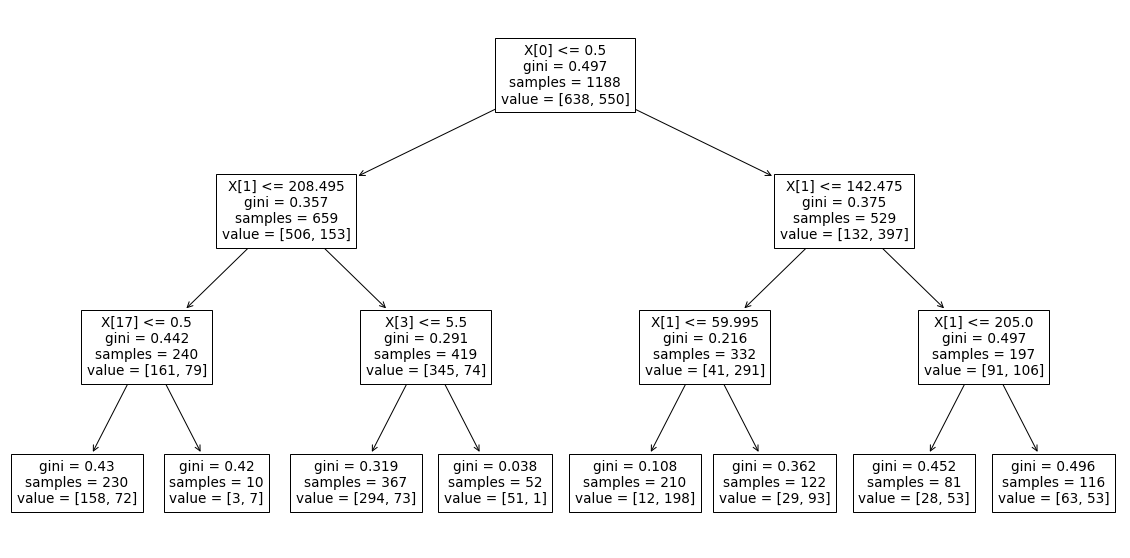

In [66]:
plt.figure(figsize=(20,10))
plot_tree(model)

In [72]:
# gini index 
# 0~0.5
# 해당되는 데이터들이 얼마나 명확하게 분류되었는지를 나타내는 지수 >> 0에 가까울수록 좋은 성능
# 완벽하게 쏠려있는 데이터(0 : 100개, 1 : 0개) : 0   >> 잘 분류한 기준
# 균일하게 섞여있는 데이터 (0 : 50개, 1 : 50개) : 0.5

X_train

,BuyItNow,startprice,charCountDescription,upperCaseDescription,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Gold,color_Space Gray,color_Unknown,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
1357,1,150.00,80,2,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
190,1,42.00,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
588,1,199.00,97,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
624,0,565.95,14,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1089,0,439.99,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0,475.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
53,1,160.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
350,1,9.99,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
79,1,45.00,25,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


[Text(0.5, 0.875, 'BuyItNow <= 0.5\ngini = 0.497\nsamples = 1188\nvalue = [638, 550]'),
 Text(0.25, 0.625, 'startprice <= 208.495\ngini = 0.357\nsamples = 659\nvalue = [506, 153]'),
 Text(0.125, 0.375, 'productline_Galaxy_S9 <= 0.5\ngini = 0.442\nsamples = 240\nvalue = [161, 79]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'upperCaseDescription <= 5.5\ngini = 0.291\nsamples = 419\nvalue = [345, 74]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'startprice <= 142.475\ngini = 0.375\nsamples = 529\nvalue = [132, 397]'),
 Text(0.625, 0.375, 'startprice <= 59.995\ngini = 0.216\nsamples = 332\nvalue = [41, 291]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'startprice <= 205.0\ngini = 0.497\nsamples = 197\nvalue = [91, 106]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

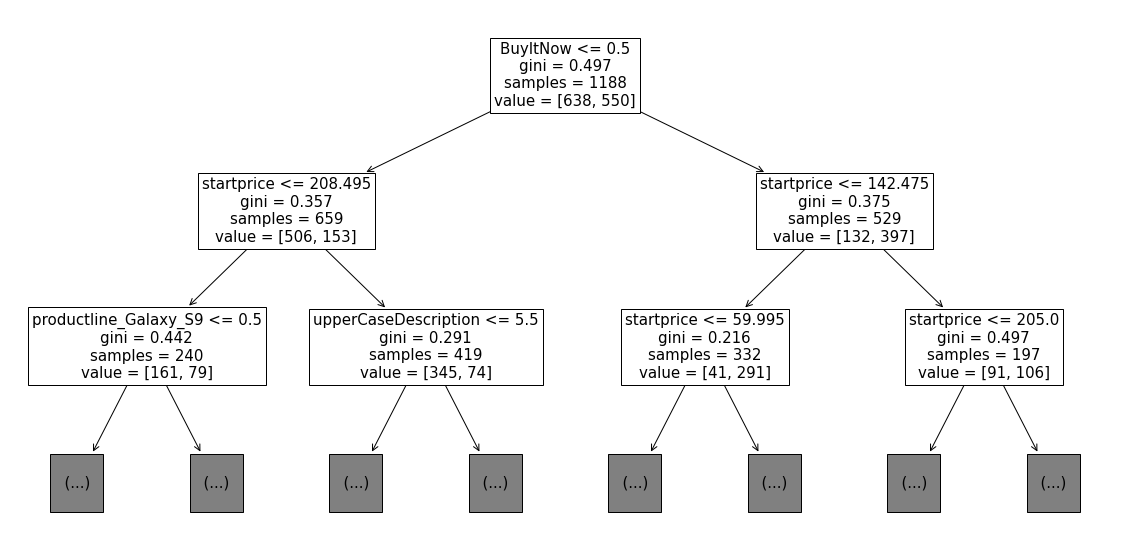

In [76]:
# 이해하기 쉬운 plot 형태로 조정
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train.columns, fontsize=15, max_depth=2)  # 모델과 상관없이 시각화 max_depth를 정해줄 수 있음